In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from math import floor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

Lectura de datos

In [2]:
data_dir = Path('')
full_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('processed_data.parquet')
)


In [3]:
full_df.shape

(23837724, 30)

In [3]:
full_df = full_df[full_df['payment_type_1'] == 1]

In [4]:
full_df.shape

(17463300, 30)

Consideraremos casos en los que se pagó con tarjeta de crédito

In [4]:
reduced_df = full_df[['airport_fee', 'PULocationID', 'DOLocationID', 'trip_distance', 'congestion_surcharge', 'pickup_day', 'pickup_month', 'pickup_hour']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    reduced_df, 
    full_df['total_amount'],  
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((12224310, 8), (5238990, 8))

In [6]:
cant = full_df[full_df['cost_caterogy'] == 'expensive'].count()[0]
cant

881825

In [7]:
balanced_df = full_df[full_df['cost_caterogy'] == 'expensive'].append(full_df[full_df['cost_caterogy'] == 'cheap'][:cant])
balanced_df = balanced_df.append(full_df[full_df['cost_caterogy'] == 'medium'][:cant])
balanced_df.shape

/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/ipykernel_60463/4216908341.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = full_df[full_df['cost_caterogy'] == 'expensive'].append(full_df[full_df['cost_caterogy'] == 'cheap'][:cant])
/var/folders/s5/5nbwzy4127vdzvv2wpcsr6hj4mpngl/T/ipykernel_60463/4216908341.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(full_df[full_df['cost_caterogy'] == 'medium'][:cant])


(2645475, 30)

In [8]:
balanced_reduced_df = balanced_df[['airport_fee', 'PULocationID', 'DOLocationID', 'trip_distance', 'congestion_surcharge', 'pickup_day', 'pickup_month', 'pickup_hour']]

In [9]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    balanced_reduced_df, 
    balanced_df['cost_caterogy'],  
    test_size=0.3,
    random_state=42)

In [10]:
balanced_df_is_cheap = balanced_df.copy(deep=True)
balanced_df_is_cheap['cost_caterogy'] = balanced_df_is_cheap['cost_caterogy'].map(lambda x: x if x == 'cheap' else 'no_cheap')

balanced_df_is_expensive = balanced_df.copy(deep=True)
balanced_df_is_expensive['cost_caterogy'] = balanced_df_is_expensive['cost_caterogy'].map(lambda x: x if x == 'expensive' else 'no_expensive')

In [11]:
cheap_reduced_df = balanced_df_is_cheap[['airport_fee', 'PULocationID', 'DOLocationID', 'trip_distance', 'congestion_surcharge', 'pickup_day', 'pickup_month', 'pickup_hour']]
expensive_reduced_df = balanced_df_is_expensive[['airport_fee', 'PULocationID', 'DOLocationID', 'trip_distance', 'congestion_surcharge', 'pickup_day', 'pickup_month', 'pickup_hour']]

In [12]:
y_cheap = balanced_df_is_cheap['cost_caterogy']

In [13]:
X_train_cheap, X_test_cheap, y_train_cheap, y_test_cheap = train_test_split(
    cheap_reduced_df, 
    y_cheap,  
    test_size=0.3,
    random_state=42,
    stratify=y_cheap)

In [14]:
y = balanced_df_is_expensive['cost_caterogy']

In [15]:
X_train_expensive, X_test_expensive, y_train_expensive, y_test_expensive = train_test_split(
    expensive_reduced_df, 
    y,  
    test_size=0.3,
    random_state=42,
    stratify=y)

RandomForest
amount
              amount_err  amountscore
RandomForest    5.249348     0.851132
DecisionTreeClassifier
classification


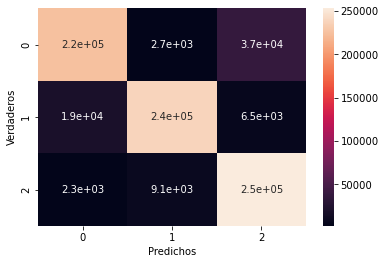

DecisionTreeClassifier
cheap


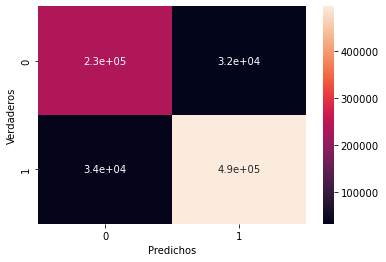

DecisionTreeClassifier
expensive


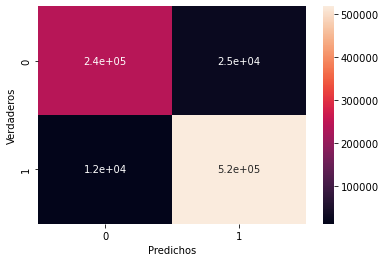

LogisticRegressionCV
classification


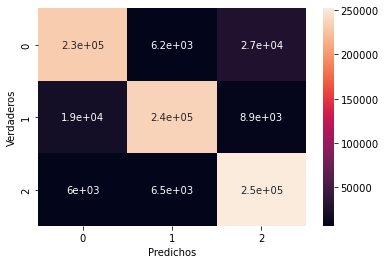

LogisticRegressionCV
cheap


/Users/ezefernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ezefernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

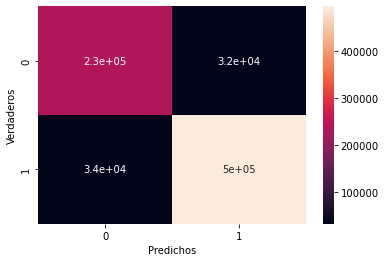

LogisticRegressionCV
expensive


/Users/ezefernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ezefernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

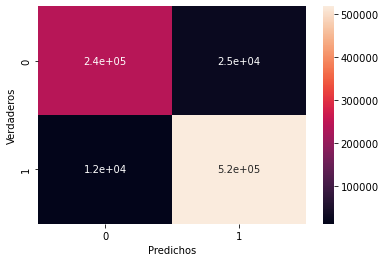

RandomForest
classification


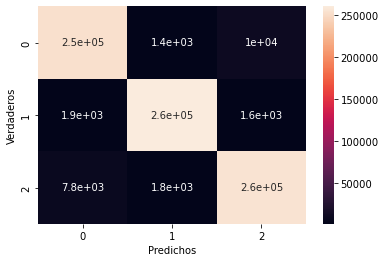

RandomForest
cheap


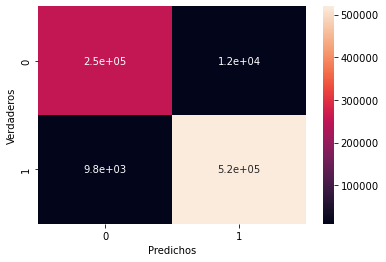

RandomForest
expensive


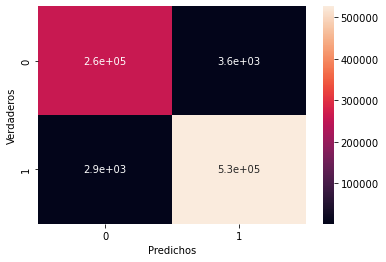

              amount_err  amountscore
RandomForest    5.249348     0.851132


In [16]:
# Modelos a ensayar.
models_scaled = [
  #  ("LinearSVC", svm.SVR(max_iter=5)),
  #  ("KNeighborsRegressor", KNeighborsRegressor()),
  #  ("LinearRegression", LinearRegression()),
  ("RandomForest", RandomForestRegressor(n_estimators=20, random_state=42)),
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Aquí almacenaremos los resultados.
results_svc_regression = {}
models_trained_svc_regression = {}

# Etrenamos cada modelo svc y almacenamos los resultados.
for m in models_scaled:
    model_name = m[0]
    results_svc_regression[model_name] = {}
    models_trained_svc_regression[model_name] = {}
    model = clone(m[1])
    
    scenario = "amount"
    print(model_name)
    print(scenario)
    model.fit(X_train_scaled[:100000], y_train[:100000])
    predictions = model.predict(X_test_scaled)
    err = mean_squared_error(y_test, predictions, squared=False)
    results_svc_regression[model_name][scenario + "_err"] = err
    results_svc_regression[model_name][scenario + "score"] = model.score(X_test_scaled,y_test)
    models_trained_svc_regression[model_name][scenario] = model

df_results_svc = pd.DataFrame(results_svc_regression).T
print(df_results_svc)


# Modelos a ensayar en clasificacion.
models_svc = [
  #  ("SVC_linear",  SVC(kernel="linear", C=0.025)),
    ("DecisionTreeClassifier", LogisticRegression(multi_class='ovr')),
    ("LogisticRegressionCV", LogisticRegressionCV(random_state=42, solver='lbfgs', max_iter=50)),
    ("RandomForest", RandomForestClassifier(n_estimators=50, random_state=42)),
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled_classification = scaler.fit_transform(X_train_classification)
X_test_scaled_classification = scaler.fit_transform(X_test_classification)

# Aquí almacenaremos los resultados.
results = {}
models_trained = {}
results_svc = {}
models_trained_svc = {}

# Etrenamos cada modelo svc y almacenamos los resultados.
for m in models_svc:
    model_name = m[0]
    results_svc[model_name] = {}
    models_trained_svc[model_name] = {}
    model = clone(m[1])
    
    scenario = "classification"
    print(model_name)
    print(scenario)
    model.fit(X_train_scaled_classification, y_train_classification)
    predictions = model.predict(X_test_scaled_classification)
    acc = accuracy_score(y_test_classification, predictions)
    results_svc[model_name][scenario + "_accuracy_score"] = accuracy_score(y_test_classification, predictions)
    results_svc[model_name][scenario + "score"] = model.score(X_test_scaled_classification, y_test_classification)
    models_trained_svc[model_name][scenario] = model
    results_svc[model_name][scenario + "confusion_matrix"] = confusion_matrix(y_test_classification, predictions)
    sns.heatmap(confusion_matrix(y_test_classification, predictions), annot=True)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()
    
    model = clone(m[1])
    scenario = "cheap"
    print(model_name)
    print(scenario)
    model.fit(X_train_cheap, y_train_cheap)
    predictions = model.predict(X_test_cheap)
    acc = accuracy_score(y_test_cheap, predictions)
    results_svc[model_name][scenario + "_accuracy_score"] = accuracy_score(y_test_cheap, predictions)
    results_svc[model_name][scenario + "score"] = model.score(X_test_cheap, y_test_cheap)
    models_trained_svc[model_name][scenario] = model
    results_svc[model_name][scenario + "confusion_matrix"] = confusion_matrix(y_test_cheap, predictions)
    sns.heatmap(confusion_matrix(y_test_cheap, predictions), annot=True)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()

    model = clone(m[1])
    scenario = "expensive"
    print(model_name)
    print(scenario)
    model.fit(X_train_expensive, y_train_expensive)
    predictions = model.predict(X_test_expensive)
    acc = accuracy_score(y_test_expensive, predictions)
    results_svc[model_name][scenario + "_accuracy_score"] = accuracy_score(y_test_expensive, predictions)
    results_svc[model_name][scenario + "score"] = model.score(X_test_expensive, y_test_expensive)
    models_trained_svc[model_name][scenario] = model
    results_svc[model_name][scenario + "confusion_matrix"] = confusion_matrix(y_test_expensive, predictions)
    sns.heatmap(confusion_matrix(y_test_expensive, predictions), annot=True)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()
   
df_results_svc_classification = pd.DataFrame(results_svc).T
print(df_results_svc)

In [17]:
df_results_svc_classification

,classification_accuracy_score,classificationscore,classificationconfusion_matrix,cheap_accuracy_score,cheapscore,cheapconfusion_matrix,expensive_accuracy_score,expensivescore,expensiveconfusion_matrix
DecisionTreeClassifier,0.902656,0.902656,"[[224806, 2656, 37352], [19286, 238426, 6506],...",0.916699,0.916699,"[[232710, 31838], [34273, 494822]]",0.953453,0.953453,"[[239661, 24887], [12055, 517040]]"
LogisticRegressionCV,0.906918,0.906918,"[[231733, 6244, 26837], [19398, 235929, 8891],...",0.916678,0.916678,"[[232302, 32246], [33882, 495213]]",0.953383,0.953383,"[[239646, 24902], [12095, 517000]]"
RandomForest,0.968879,0.968879,"[[253241, 1430, 10143], [1929, 260655, 1634], ...",0.972974,0.972974,"[[252888, 11660], [9789, 519306]]",0.991736,0.991736,"[[260937, 3611], [2948, 526147]]"


Feature: airport_fee, Score: 0.00000
Feature: PULocationID, Score: 0.04317
Feature: DOLocationID, Score: 0.04783
Feature: trip_distance, Score: 0.83257
Feature: congestion_surcharge, Score: 0.00815
Feature: pickup_day, Score: 0.02497
Feature: pickup_month, Score: 0.01786
Feature: pickup_hour, Score: 0.02546


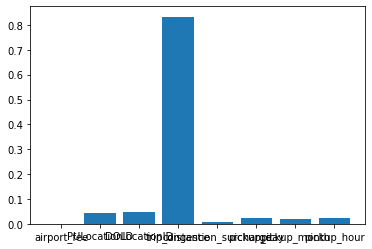

In [17]:
importance = balanced_df_is_expensive['RandomForest']['amount'].feature_importances_
for i,v in zip(X_train.columns, importance):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(list(X_train.columns), list(importance))
pyplot.show()

Feature: airport_fee, Score: 0.00000
Feature: PULocationID, Score: 0.06645
Feature: DOLocationID, Score: 0.04590
Feature: trip_distance, Score: 0.44866
Feature: congestion_surcharge, Score: 0.02463
Feature: pickup_day, Score: 0.20470
Feature: pickup_month, Score: 0.18709
Feature: pickup_hour, Score: 0.02257


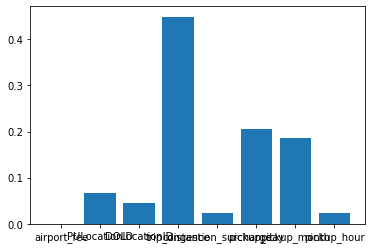

In [34]:
importance = models_trained['RandomForest']['classification'].feature_importances_
for i,v in zip(X_train.columns, importance):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(list(X_train.columns), list(importance))
pyplot.show()

Consideramos PCA

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component1', 'principal_component2','principal_component3','principal_component4','principal_component5'])
plt.plot(np.cumsum(pca.explained_variance_ratio_)); plt.grid(True);
plt.plot(pca.explained_variance_ratio_); plt.grid(True);